<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Set-up" data-toc-modified-id="Set-up-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Set up</a></span></li><li><span><a href="#Read-data" data-toc-modified-id="Read-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read data</a></span><ul class="toc-item"><li><span><a href="#Read-financial-data" data-toc-modified-id="Read-financial-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Read financial data</a></span></li><li><span><a href="#Read-temperature-data" data-toc-modified-id="Read-temperature-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Read temperature data</a></span><ul class="toc-item"><li><span><a href="#Montly-temp-differ-data" data-toc-modified-id="Montly-temp-differ-data-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Montly temp differ data</a></span></li><li><span><a href="#Yearly-temp-differ-data" data-toc-modified-id="Yearly-temp-differ-data-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Yearly temp differ data</a></span></li><li><span><a href="#Bushfire-data" data-toc-modified-id="Bushfire-data-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Bushfire data</a></span></li></ul></li></ul></li><li><span><a href="#US-Average-Temp-difference-Correlation-Analysis" data-toc-modified-id="US-Average-Temp-difference-Correlation-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>US Average Temp difference Correlation Analysis</a></span><ul class="toc-item"><li><span><a href="#Monthly" data-toc-modified-id="Monthly-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Monthly</a></span></li><li><span><a href="#Yearly" data-toc-modified-id="Yearly-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Yearly</a></span></li></ul></li><li><span><a href="#Temp-difference-on-States" data-toc-modified-id="Temp-difference-on-States-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Temp difference on States</a></span><ul class="toc-item"><li><span><a href="#1-year" data-toc-modified-id="1-year-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>1 year</a></span></li><li><span><a href="#2-Year" data-toc-modified-id="2-Year-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>2 Year</a></span></li><li><span><a href="#3-Year" data-toc-modified-id="3-Year-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>3 Year</a></span></li></ul></li><li><span><a href="#Bushfires" data-toc-modified-id="Bushfires-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Bushfires</a></span></li><li><span><a href="#ROA-Differ" data-toc-modified-id="ROA-Differ-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>ROA Differ</a></span></li><li><span><a href="#Appendix" data-toc-modified-id="Appendix-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Appendix</a></span><ul class="toc-item"><li><span><a href="#Person" data-toc-modified-id="Person-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Person</a></span></li><li><span><a href="#Spearman" data-toc-modified-id="Spearman-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Spearman</a></span></li><li><span><a href="#Kendall" data-toc-modified-id="Kendall-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Kendall</a></span></li></ul></li></ul></div>

# Set up

In [5]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau

import matplotlib.pyplot as plt

import numpy as np
import os
import pandas as pd
import json
import re, datetime
from geopy.geocoders import Nominatim

# Read data

## Read financial data

In [6]:
def toInt(l:list) -> list:
    for i in range(len(l)):
        l[i] = float(l[i])

root_path = os.path.abspath(os.path.dirname(os.getcwd()))
data_path = os.path.join(root_path, 'data')
agr_path = os.path.join(data_path, 'agriculture')

finc_data = []
for file in os.listdir(agr_path):
    if file.endswith('.json'):
        file_path = os.path.join(agr_path, file)
        with open(file_path, 'r') as file:
            finc_data.append(json.load(file))
        
ROA1_data = {}
ROA2_data = {}
state_data = {}
for i in finc_data:
    for k, v in i.items():
        try:
            state_data[k] =  i[k]['state']
            ROA1_data[k] = pd.DataFrame.from_dict(i[k]['ROA1']) 
            ROA2_data[k] = pd.DataFrame.from_dict(i[k]['ROA2']) 
        except:
            pass

In [231]:
l = ['YTEN', 
'AVD', 
'IPI', 
'MGPI', 
'SMG', 
'FMC', 
'MBII', 
'UAN', 
'CF', 
'MOS', ]
for c in l:
    for i in finc_data:
        for k, v in i.items():
            if k == c:
#                 print(k, i[k]['name'], "\url"+'{'+i[k]['website']+'}', '\n')
                print(k, '\t', i[k]['name'], '\t', "\\url"+'{'+i[k]['website']+'}', '\n')

YTEN 	 Yield10 Bioscience, Inc. 	 \url{http://www.yield10bio.com} 

AVD 	 American Vanguard Corporation 	 \url{http://www.american-vanguard.com} 

IPI 	 Intrepid Potash, Inc. 	 \url{http://www.intrepidpotash.com} 

MGPI 	 MGP Ingredients, Inc. 	 \url{http://www.mgpingredients.com} 

SMG 	 The Scotts Miracle-Gro Company 	 \url{http://www.scottsmiraclegro.com} 

FMC 	 FMC Corporation 	 \url{http://www.fmc.com} 

MBII 	 Marrone Bio Innovations, Inc. 	 \url{http://www.marronebio.com} 

UAN 	 CVR Partners, LP 	 \url{http://www.cvrpartners.com} 

CF 	 CF Industries Holdings, Inc. 	 \url{http://www.cfindustries.com} 

MOS 	 The Mosaic Company 	 \url{http://www.mosaicco.com} 



In [ ]:
# transform dict to pd
# pd.DataFrame.from_dict(finc_data[0]['RKDA']['stock prices']) 

In [ ]:
ROA2_data['MGPI']

In [ ]:
ROA_data['SMG']

In [ ]:
ROA_data['MOS']

## Read temperature data

### Montly temp differ data

In [3]:
climate_path = os.path.join(data_path, 'climate')
climate_path = os.path.join(climate_path, 'US_temperature_data')

file_name = 'monthly_temp_difference(1980-2013).csv'
file_path = os.path.join(climate_path, file_name)
temp_diff_montly_data = pd.read_csv(file_path)

rename the time_difference

In [4]:
time_diff = []
for i in temp_diff_montly_data["Time_Difference"]:
    i = i.split('-')
    month = re.compile(r'(?<= )\d+(?=])')
    month = re.search(month, i[-1])[0] # get the month
    i = month + '/31/' + i[0]
    time_diff.append(i)
temp_diff_montly_data["Time_Difference"] = time_diff

### Yearly temp differ data

In [18]:
climate_path = os.path.join(data_path, 'climate')
climate_path = os.path.join(climate_path, 'US_temperature_data')

file_name = 'Yearly_temp_difference.csv'
file_path = os.path.join(climate_path, file_name)
temp_diff_yearly_data = pd.read_csv(file_path)

### Bushfire data

In [297]:
climate_path = os.path.join(data_path, 'climate')

file_name = 'Wildfire_data.csv'
file_path = os.path.join(climate_path, file_name)
bushfire_data = pd.read_csv(file_path)

# US Average Temp difference Correlation Analysis

1. `SEED` = ROA varies a little
2. cluster between ROA and temperature

In [292]:
def corr_ana(l1:list, l2:list, x, y):
    assert len(roa_data) == len(temp_data)
    if len(l1) > 2:
        # Pearson correlation
        pearson = pearsonr(l1, l2)[0]
        p_p_value = pearsonr(l1, l2)[1]
        # Spearman correlation
        spearman = spearmanr(l1, l2)[0]
        s_p_value = spearmanr(l1, l2)[1]
        # Kendall correlation
        tau, k_p_value = kendalltau(l1, l2)
        # print the results
        print("""{pearson:.3f}({p_p_value:.3f})\t{spearman:.3f}({s_p_value:.3f})\t{kendall:.3f}({k_p_value:.3f})
        """.format(comp = comp, pearson = pearson, p_p_value = p_p_value,
                    spearman = spearman, s_p_value = s_p_value, 
                     kendall = tau, k_p_value = k_p_value, y = y))
#         print(f'{pearson}({p_p_value}), {spearman}({s_p_value}), {tau}({k_p_value})')
#         print("""Correlation analysis between {comp} and {y}:
#         Perason coefficient is {pearson:.3f} with {p_p_value:.3f} p-value.
#         Spearman coefficient is {spearman:.3f} with {s_p_value:.3f} p-value.
#         Kendall coefficient is {kendall:.3f} with {k_p_value:.3f} p-value.
#         """.format(comp = comp, pearson = pearson, p_p_value = p_p_value,
#                     spearman = spearman, s_p_value = s_p_value, 
#                      kendall = tau, k_p_value = k_p_value, y = y))
        plt.scatter(l1, l2)
        plt.xlabel(x)
        plt.ylabel(y)
        plt.show()
    else:
        pass
#         print("\nData Insufficient.\n")

## Monthly

In [8]:
for comp in ROA_data.keys():
    roa_data = []
    temp_data = []
    for i in ROA_data[comp].iloc[:,range(1, ROA_data[comp].shape[1])]:
#         print(i)
        try: 
            t = temp_diff_montly_data.loc[temp_diff_montly_data['Time_Difference'] == i]['Temperature_Difference']
            t = t.values[0]
            if t:
                roa = ROA_data[comp][i].values[0]
                roa = float(roa)
                if roa and not np.isnan(roa): # to aviod nan value
                    roa_data.append(roa)
                    temp_data.append(t)
        except:
            pass
        # try correlation analysis
    corr_ana(roa_data, temp_data, 'ROA', 'Monthly Temp Diff')

NameError: name 'ROA_data' is not defined

## Yearly

In [ ]:
for comp in ROA_data.keys(): 
    roa_data = []
    temp_data = []
    for i in ROA_data[comp].iloc[:,range(1, ROA_data[comp].shape[1])]:
        year = i.split('/')[-1]
        try: 
            t = temp_diff_yearly_data.loc[temp_diff_yearly_data['Year'] == int(year)]['Difference']
            t = t.values[0]
            if t:
                roa = ROA_data[comp][i][0]
                roa = float(roa)
                if roa and not np.isnan(roa):
                    roa_data.append(roa)
                    temp_data.append(t)
        except:
            pass
    corr_ana(roa_data, temp_data, 'ROA', 'Yearly Temp Diff')

# Temp difference on States

In [20]:
# get us companies
us_comps = []

for comp in finc_data:
    name = list(comp.keys())[0]
    if comp[name]['location'][-1] == 'United States':
        us_comps.append(comp)

# read raw temp data
climate_path = os.path.join(data_path, 'climate')
climate_path = os.path.join(climate_path, 'US_temperature_data')
file_name = 'original_temp_data.csv'
file_path = os.path.join(climate_path, file_name)
raw_temp_date = pd.read_csv(file_path)

Want I want = the pairs of (ROA, temp differ)

The logic:

1. get the state of the company
2. get the state temperature 
3. according to the company's ROA date, get the timeline which helps us to find the corresponding temperature data
4. temperature difference = current year avg. temp - the past *n* years avg. temp

In [131]:
def temp_diff_roa1_pairs(skip: int, comp):
    """
    :i = the past n year(s)
    :comp = comp
    """
    state = state_data[comp] # get state
    state_temp = raw_temp_date.loc[raw_temp_date['State'] == state] # get state temp date
    state_temp = state_temp.set_index("Date") # set Date as row index
    
    # get roa timeline
    roa_time = []
    for i in ROA1_data[comp].iloc[:,range(1, ROA1_data[comp].shape[1])]:
        try:
            i = i.split('/')
            roa_time.append(datetime.date(int(i[-1]), int(i[0]), int(i[1])))
        except:
            pass
        
    # get temp timeline
    state_temp_time = []
    for i in state_temp.index.values:
        i = i.split('/')
        state_temp_time.append(datetime.date(int(i[0]), int(i[1]), int(i[2])))
    
    # get the roa interval
    
    # get the temp timeline 
    
    temp_curr_avg = []
    temp_past_avg = []
    roa_index = []
    # for each interval(elementc) in roa, we need to find the corresponding temp difference
    # the corresponding temp difference = the current avg. temp - the avg. temp over past n years in the same interval
    for roa in range(len(roa_time)):
        now = roa_time[roa]
        now_year = roa_time[roa].year
        now_month = roa_time[roa].month
        now_day = roa_time[roa].day
        try: # use exisiting data to get the interval
            past = roa_time[roa + 1]
            past_year = roa_time[roa + 1].year
            past_month = roa_time[roa + 1].month
            past_day = roa_time[roa + 1].day
        except: # assume the past year for the last element
            past_year = now_year - 1
            past_month = now_month
            past_day = now_day
            past = datetime.date(past_year, past_month, past_day)
        temp_sum = 0
        temp_count = 0
        # get current year
        for temp in range(len(state_temp_time)):
            if past <= state_temp_time[temp] < now:
                year = str(state_temp_time[temp].year)
                month = str(state_temp_time[temp].month)
                day = str(state_temp_time[temp].day)
                timestamp = year + '/' + month + '/' + day
                temp_sum += state_temp.loc[timestamp].values[0]
                temp_count += 1       
        if temp_count == 0:
            continue
        temp_curr_avg.append(temp_sum/temp_count)
        temp_count = 0
        # get the past year
        for n in range(1, skip+1):
            now_year -= n
            past_year -= n
            now = datetime.date(now_year, now_month, now_day)
            past = datetime.date(past_year, past_month, past_day)
            for temp in range(len(state_temp_time)):
                if past <= state_temp_time[temp] < now:
                    year = str(state_temp_time[temp].year)
                    month = str(state_temp_time[temp].month)
                    day = str(state_temp_time[temp].day)
                    timestamp = year + '/' + month + '/' + day
                    temp_sum += state_temp.loc[timestamp].values[0]
                    temp_count += 1
        temp_past_avg.append(temp_sum/temp_count)
        roa_index.append(roa)
    roa_data = []
    count = 0
    # get roa_data
    for i in ROA1_data[comp].iloc[:,range(1, ROA1_data[comp].shape[1])]:
        count += 1
        if count in roa_index:
            roa_data.append(float(ROA1_data[comp][i].values[0]))
    # get temp difference
    temp_diff = [a - b for a, b in zip(temp_curr_avg, temp_past_avg)]
    return temp_diff, roa_data

In [132]:
def temp_diff_roa2_pairs(skip: int, comp):
    """
    :i = the past n year(s)
    :comp = comp
    """
    state = state_data[comp] # get state
    state_temp = raw_temp_date.loc[raw_temp_date['State'] == state] # get state temp date
    state_temp = state_temp.set_index("Date") # set Date as row index
    
    # get roa timeline
    roa_time = []
    for i in ROA2_data[comp].iloc[:,range(1, ROA2_data[comp].shape[1])]:
        try:
            i = i.split('/')
            roa_time.append(datetime.date(int(i[-1]), int(i[0]), int(i[1])))
        except:
            pass
        
    # get temp timeline
    state_temp_time = []
    for i in state_temp.index.values:
        i = i.split('/')
        state_temp_time.append(datetime.date(int(i[0]), int(i[1]), int(i[2])))
    
    # get the roa interval
    
    # get the temp timeline 
    
    temp_curr_avg = []
    temp_past_avg = []
    roa_index = []
    # for each interval(elementc) in roa, we need to find the corresponding temp difference
    # the corresponding temp difference = the current avg. temp - the avg. temp over past n years in the same interval
    for roa in range(len(roa_time)):
        now = roa_time[roa]
        now_year = roa_time[roa].year
        now_month = roa_time[roa].month
        now_day = roa_time[roa].day
        try: # use exisiting data to get the interval
            past = roa_time[roa + 1]
            past_year = roa_time[roa + 1].year
            past_month = roa_time[roa + 1].month
            past_day = roa_time[roa + 1].day
        except: # assume the past year for the last element
            past_year = now_year - 1
            past_month = now_month
            past_day = now_day
            past = datetime.date(past_year, past_month, past_day)
        temp_sum = 0
        temp_count = 0
        # get current year
        for temp in range(len(state_temp_time)):
            if past <= state_temp_time[temp] < now:
                year = str(state_temp_time[temp].year)
                month = str(state_temp_time[temp].month)
                day = str(state_temp_time[temp].day)
                timestamp = year + '/' + month + '/' + day
                temp_sum += state_temp.loc[timestamp].values[0]
                temp_count += 1       
        if temp_count == 0:
            continue
        temp_curr_avg.append(temp_sum/temp_count)
        temp_count = 0
        # get the past year
        for n in range(1, skip+1):
            now_year -= n
            past_year -= n
            now = datetime.date(now_year, now_month, now_day)
            past = datetime.date(past_year, past_month, past_day)
            for temp in range(len(state_temp_time)):
                if past <= state_temp_time[temp] < now:
                    year = str(state_temp_time[temp].year)
                    month = str(state_temp_time[temp].month)
                    day = str(state_temp_time[temp].day)
                    timestamp = year + '/' + month + '/' + day
                    temp_sum += state_temp.loc[timestamp].values[0]
                    temp_count += 1
        temp_past_avg.append(temp_sum/temp_count)
        roa_index.append(roa)
    roa_data = []
    count = 0
    # get roa_data
    for i in ROA2_data[comp].iloc[:,range(1, ROA2_data[comp].shape[1])]:
        count += 1
        if count in roa_index:
            roa_data.append(float(ROA2_data[comp][i].values[0]))
    # get temp difference
    temp_diff = [a - b for a, b in zip(temp_curr_avg, temp_past_avg)]
    return temp_diff, roa_data

## 1 year

In [244]:
roa1 = 0
roa2 = 0
roa1p = 0 
roa2p = 0 
roa1awe = 0
roa2awe = 0

for comp in ROA1_data.keys(): 
    for i in range(1, 4):
        temp_data, roa_data = temp_diff_roa1_pairs(i, comp)
        c1, p1 = corr_ana(roa_data, temp_data, 'ROA1', 'Yearly Temp Diff')
        temp_data, roa_data = temp_diff_roa2_pairs(i, comp)
        c2, p2 = corr_ana(roa_data, temp_data, 'ROA2', 'Yearly Temp Diff')
        if c1 == [0,0,0]:
            continue
        print(f"'{comp}', ")
        for i in range(3):
            if abs(c1[i]) > abs(c2[i]):
                roa1 += 1
            else:
                roa2 += 1
            if p1 < p2:
                roa1p += 1
            else:
                roa2p += 1
            if abs(c1[i]) > abs(c2[i]) and p1 < p2:
                roa1awe += 1
            elif abs(c1[i]) < abs(c2[i]) and p1 > p2:
                roa2awe += 1
print('{:.2f} {:.2f} {:.2f} {:.2f} {:.2f} {:.2f}'.format(roa1/90, roa2/90, roa1p/90, roa2p/90, roa1awe/90, roa2awe/30))



'YTEN', 
'YTEN', 
'YTEN', 
'AVD', 
'AVD', 
'AVD', 
'IPI', 
'IPI', 
'IPI', 
'MGPI', 
'MGPI', 
'MGPI', 
'SMG', 
'SMG', 
'SMG', 
'FMC', 
'FMC', 
'FMC', 
'MBII', 
'MBII', 
'MBII', 
'UAN', 
'UAN', 
'UAN', 
'CF', 
'CF', 
'CF', 
'MOS', 
'MOS', 
'MOS', 
0.66 0.34 0.67 0.33 0.58 0.53


In [280]:
def corr_ana(l1:list, l2:list, x, y):
    assert len(roa_data) == len(temp_data)
    if len(l1) > 2:
        # Pearson correlation
        pearson = pearsonr(l1, l2)[0]
        p_p_value = pearsonr(l1, l2)[1]
        # Spearman correlation
        spearman = spearmanr(l1, l2)[0]
        s_p_value = spearmanr(l1, l2)[1]
        # Kendall correlation
        tau, k_p_value = kendalltau(l1, l2)
        # print the results
        print("""{pearson:.3f}({p_p_value:.3f})\t{spearman:.3f}({s_p_value:.3f})\t{kendall:.3f}({k_p_value:.3f})
        """.format(comp = comp, pearson = pearson, p_p_value = p_p_value,
                    spearman = spearman, s_p_value = s_p_value, 
                     kendall = tau, k_p_value = k_p_value, y = y))
#         print(f'{pearson}({p_p_value}), {spearman}({s_p_value}), {tau}({k_p_value})')
#         print("""Correlation analysis between {comp} and {y}:
#         Perason coefficient is {pearson:.3f} with {p_p_value:.3f} p-value.
#         Spearman coefficient is {spearman:.3f} with {s_p_value:.3f} p-value.
#         Kendall coefficient is {kendall:.3f} with {k_p_value:.3f} p-value.
#         """.format(comp = comp, pearson = pearson, p_p_value = p_p_value,
#                     spearman = spearman, s_p_value = s_p_value, 
#                      kendall = tau, k_p_value = k_p_value, y = y))
        plt.scatter(l1, l2)
        plt.xlabel(x)
        plt.ylabel(y)
        title = f'The Scatter Plot between {comp} {x} and {y}'
        plt.title(title)
        plt.show()
        coe = [pearson, spearman, tau]
        p_value = [p_p_value, s_p_value, k_p_value]
        return coe, p_value
    else:
        return [0, 0, 0], [0, 0, 0]
#         print("\nData Insufficient.\n")

In [ ]:
temp_data, roa_data = temp_diff_roa1_diff_pairs(4, 4, comp)
corr_ana(roa_data, temp_data, 'ROA', 'Yearly Temp Diff')
temp_data, roa_data = temp_diff_roa2_diff_pairs(4, 4, comp)
corr_ana(roa_data, temp_data, 'ROA', 'Yearly Temp Diff')

In [263]:
roa1 = 0
roa2 = 0
roa1p = 0 
roa2p = 0 
roa1awe = 0
roa2awe = 0
count = 0 

for comp in ROA1_data.keys(): 
    for i in range(1, 4):
        temp_data, roa_data = temp_diff_roa1_diff_pairs(i, 3, comp)
        c1, p1 = corr_ana(roa_data, temp_data, 'ROA1', 'Yearly Temp Diff')
        temp_data, roa_data = temp_diff_roa2_diff_pairs(i, 3, comp)
        c2, p2 = corr_ana(roa_data, temp_data, 'ROA2', 'Yearly Temp Diff')
        if c1 == [0,0,0]:
            continue
        print(f"'{comp}', ")
        for i in range(3):
            count += 1
            if abs(c1[i]) > abs(c2[i]):
                roa1 += 1
            else:
                roa2 += 1
            if p1 < p2:
                roa1p += 1
            else:
                roa2p += 1
            if abs(c1[i]) > abs(c2[i]) and p1 < p2:
                roa1awe += 1
            elif abs(c1[i]) < abs(c2[i]) and p1 > p2:
                roa2awe += 1
print('{:.2f} {:.2f} {:.2f} {:.2f} {:.2f} {:.2f}'.format(roa1/count, roa2/count, roa1p/count, roa2p/count, roa1awe/count, roa2awe/30))



'YTEN', 
'YTEN', 
'YTEN', 
'AVD', 
'AVD', 
'AVD', 
'IPI', 
'IPI', 
'IPI', 
'MGPI', 
'MGPI', 
'MGPI', 
'SMG', 
'SMG', 
'SMG', 
'FMC', 
'FMC', 
'FMC', 
'UAN', 
'UAN', 
'UAN', 
'CF', 
'CF', 
'CF', 
'MOS', 
'MOS', 
'MOS', 
0.49 0.51 0.37 0.63 0.22 0.93


IPI
0.030(0.962)	0.000(1.000)	-0.200(0.817)
        


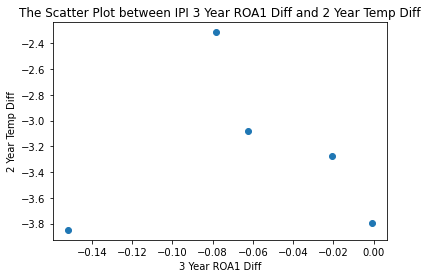

-0.978(0.022)	-1.000(0.000)	-1.000(0.083)
        


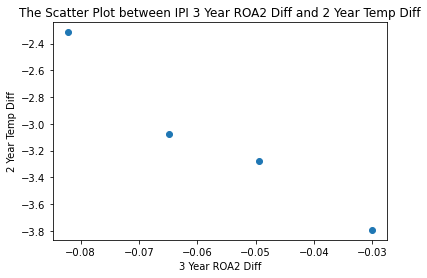

([-0.9779288548211187, -1.0, -1.0],
 [0.022071145178881313, 0.0, 0.08333333333333333])

In [284]:
comp = 'IPI'
print(comp)
temp_data, roa_data = temp_diff_roa1_diff_pairs(2, 3, comp)
corr_ana(roa_data, temp_data, '3 Year ROA1 Diff', '2 Year Temp Diff')
temp_data, roa_data = temp_diff_roa2_diff_pairs(2, 3, comp)
corr_ana(roa_data, temp_data, '3 Year ROA2 Diff', '2 Year Temp Diff')

YTEN
-0.467(0.173)	-0.442(0.200)	-0.333(0.216)
        


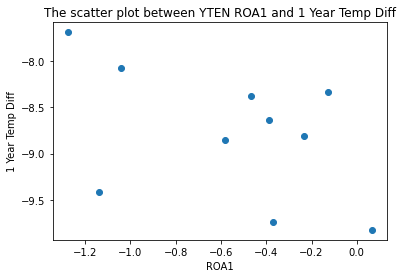

-0.652(0.041)	-0.588(0.074)	-0.467(0.073)
        


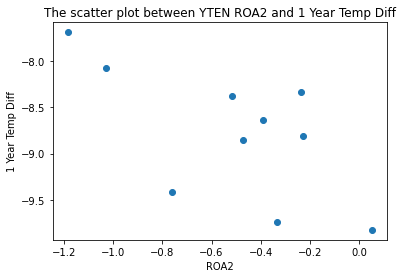

In [185]:
comp = 'YTEN'
print(comp)
temp_data, roa_data = temp_diff_roa1_pairs(1, comp)
corr_ana(roa_data, temp_data, 'ROA1', '1 Year Temp Diff')
temp_data, roa_data = temp_diff_roa2_pairs(1, comp)
corr_ana(roa_data, temp_data, 'ROA2', '1 Year Temp Diff')

## 2 Year

In [144]:
for comp in ROA1_data.keys(): 
    print(comp)
    temp_data, roa_data = temp_diff_roa1_pairs(2, comp)
    corr_ana(roa_data, temp_data, 'ROA', 'Yearly Temp Diff')
    temp_data, roa_data = temp_diff_roa2_pairs(2, comp)
    corr_ana(roa_data, temp_data, 'ROA', 'Yearly Temp Diff')

RKDA
YTEN
-0.366(0.298)	-0.309(0.385)	-0.244(0.381)
        
-0.371(0.291)	-0.309(0.385)	-0.200(0.484)
        
AVD
-0.084(0.669)	0.195(0.320)	0.138(0.317)
        
-0.084(0.671)	0.195(0.319)	0.153(0.263)
        
CTA-PB
IPI
-0.678(0.065)	-0.524(0.183)	-0.429(0.179)
        
-0.609(0.109)	-0.476(0.233)	-0.357(0.275)
        
MGPI
0.130(0.528)	0.032(0.877)	0.015(0.930)
        
0.124(0.548)	0.022(0.917)	0.003(1.000)
        
SMG
-0.135(0.529)	-0.105(0.625)	-0.080(0.606)
        
-0.144(0.502)	-0.117(0.588)	-0.087(0.572)
        
FMC
0.106(0.592)	0.112(0.570)	0.079(0.570)
        
0.091(0.647)	0.054(0.784)	0.042(0.769)
        
MBII
0.356(0.768)	0.500(0.667)	0.333(1.000)
        
0.564(0.618)	0.500(0.667)	0.333(1.000)
        
CTVA
UAN
-0.056(0.916)	-0.086(0.872)	-0.200(0.719)
        
-0.049(0.926)	0.029(0.957)	-0.067(1.000)
        
CF
0.123(0.719)	0.191(0.574)	0.055(0.879)
        
0.031(0.928)	0.109(0.750)	0.018(1.000)
        
CTA-PA
MOS
0.071(0.726)	0.018(0.928)	0.009(0.967)
      

## 3 Year

In [146]:
for comp in ROA1_data.keys(): 
#     print(comp)
    temp_data, roa_data = temp_diff_roa1_pairs(3, comp)
    corr_ana(roa_data, temp_data, 'ROA', 'Yearly Temp Diff')
    temp_data, roa_data = temp_diff_roa2_pairs(3, comp)
    corr_ana(roa_data, temp_data, 'ROA', 'Yearly Temp Diff')

-0.261(0.466)	-0.139(0.701)	-0.067(0.862)
        
-0.239(0.507)	-0.067(0.855)	-0.022(1.000)
        
-0.103(0.603)	0.063(0.748)	0.048(0.739)
        
-0.090(0.647)	0.084(0.670)	0.063(0.652)
        
-0.609(0.109)	-0.357(0.385)	-0.286(0.399)
        
-0.549(0.158)	-0.310(0.456)	-0.214(0.548)
        
0.232(0.255)	0.197(0.336)	0.138(0.336)
        
0.231(0.257)	0.186(0.362)	0.126(0.382)
        
-0.159(0.457)	-0.088(0.683)	-0.072(0.641)
        
-0.183(0.393)	-0.094(0.662)	-0.065(0.677)
        
0.042(0.833)	0.123(0.532)	0.090(0.518)
        
0.033(0.868)	0.070(0.725)	0.032(0.830)
        
0.419(0.725)	0.500(0.667)	0.333(1.000)
        
0.619(0.575)	0.500(0.667)	0.333(1.000)
        
-0.082(0.878)	0.029(0.957)	-0.067(1.000)
        
-0.075(0.887)	0.200(0.704)	0.067(1.000)
        
0.243(0.472)	0.345(0.298)	0.236(0.359)
        
0.180(0.596)	0.255(0.450)	0.127(0.648)
        
0.053(0.793)	0.021(0.916)	0.043(0.773)
        
0.044(0.829)	0.007(0.973)	0.020(0.901)
        


# Bushfires

In [327]:
def corr_ana(l1:list, l2:list, x, y):
#     assert len(roa_data) == len(temp_data)/
    if len(l1) > 2:
        # Pearson correlation
        pearson = pearsonr(l1, l2)[0]
        p_p_value = pearsonr(l1, l2)[1]
        # Spearman correlation
        spearman = spearmanr(l1, l2)[0]
        s_p_value = spearmanr(l1, l2)[1]
        # Kendall correlation
        tau, k_p_value = kendalltau(l1, l2)
        # print the results
        print("""{pearson:.3f}({p_p_value:.3f})\t{spearman:.3f}({s_p_value:.3f})\t{kendall:.3f}({k_p_value:.3f})
        """.format(comp = comp, pearson = pearson, p_p_value = p_p_value,
                    spearman = spearman, s_p_value = s_p_value, 
                     kendall = tau, k_p_value = k_p_value, y = y))
#         print(f'{pearson}({p_p_value}), {spearman}({s_p_value}), {tau}({k_p_value})')
#         print("""Correlation analysis between {comp} and {y}:
#         Perason coefficient is {pearson:.3f} with {p_p_value:.3f} p-value.
#         Spearman coefficient is {spearman:.3f} with {s_p_value:.3f} p-value.
#         Kendall coefficient is {kendall:.3f} with {k_p_value:.3f} p-value.
#         """.format(comp = comp, pearson = pearson, p_p_value = p_p_value,
#                     spearman = spearman, s_p_value = s_p_value, 
#                      kendall = tau, k_p_value = k_p_value, y = y))
        plt.scatter(l1, l2)
        plt.xlabel(x)
        plt.ylabel(y)
        title = f'The Scatter Plot between {comp} {x} and {y}'
        plt.title(title)
        plt.show()
        coe = [pearson, spearman, tau]
        p_value = [p_p_value, s_p_value, k_p_value]
        return coe, p_value
    else:
        return [0, 0, 0], [0, 0, 0]
#         print("\nData Insufficient.\n")

0.305(0.075)	0.266(0.123)	0.170(0.151)
        


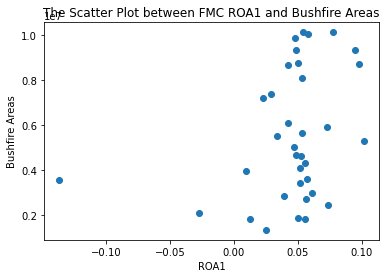

0.353(0.041)	0.264(0.131)	0.169(0.159)
        


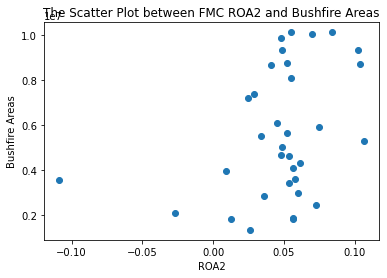

In [330]:
for comp in ROA1_data.keys(): 
    roa1_data = []
    roa2_data = []
    temp_data = []
    for i in ROA1_data[comp].iloc[:,range(1, ROA1_data[comp].shape[1])]:
        year = i.split('/')[-1]
        try: 
            t = bushfire_data.loc[bushfire_data['Year'] == int(year)]['Acres']
            t = int(t.values[0].replace(',', ''))
            if t:
                roa = ROA1_data[comp][i][0]
                roa = float(roa)
                if roa and roa is not np.isnan(roa):
                    roa1_data.append(roa)
                    temp_data.append(t)
        except:
            pass
    if roa1_data:
        if comp == 'FMC':
            corr_ana(roa1_data, temp_data, 'ROA1', 'Bushfire Areas')
    temp_data = []
    for i in ROA2_data[comp].iloc[:,range(1, ROA2_data[comp].shape[1])]:
        year = i.split('/')[-1]
        try: 
            t = bushfire_data.loc[bushfire_data['Year'] == int(year)]['Acres']
            t = int(t.values[0].replace(',', ''))
            if t:
                roa = ROA2_data[comp][i][0]
                roa = float(roa)
                if roa and not np.isnan(roa):
                    roa2_data.append(roa)
                    temp_data.append(t)
        except:
            pass
    if roa2_data:
        if comp == 'FMC':
            corr_ana(roa2_data, temp_data, 'ROA2', 'Bushfire Areas')

In [ ]:
ROA_data['RKDA']

In [ ]:
ROA_data['YTEN']

# ROA Differ

In [149]:
def temp_diff_roa1_diff_pairs(skip1: int, skip2: int, comp):
    """
    :skip1 = the past n year(s) for temp
    :skip2 = the past n year(s) for ROA
    :comp = comp
    """
    state = state_data[comp] # get state
    state_temp = raw_temp_date.loc[raw_temp_date['State'] == state] # get state temp date
    state_temp = state_temp.set_index("Date") # set Date as row index
    
    # get roa timeline
    roa_time = []
    for i in ROA1_data[comp].iloc[:,range(1, ROA1_data[comp].shape[1])]:
        try:
            i = i.split('/')
            roa_time.append(datetime.date(int(i[-1]), int(i[0]), int(i[1])))
        except:
            pass
        
    # get temp timeline
    state_temp_time = []
    for i in state_temp.index.values:
        i = i.split('/')
        state_temp_time.append(datetime.date(int(i[0]), int(i[1]), int(i[2])))
    
    # get the roa interval
    
    # get the temp timeline 
    
    temp_curr_avg = []
    temp_past_avg = []
    roa_index = []
    roa_past_avg = []
    # for each interval(elementc) in roa, we need to find the corresponding temp difference
    # the corresponding temp difference = the current avg. temp - the avg. temp over past n years in the same interval
    for roa in range(len(roa_time)):
        now = roa_time[roa]
        now_year = roa_time[roa].year
        now_month = roa_time[roa].month
        now_day = roa_time[roa].day
        try: # use exisiting data to get the interval
            past = roa_time[roa + 1]
            past_year = roa_time[roa + 1].year
            past_month = roa_time[roa + 1].month
            past_day = roa_time[roa + 1].day
            past_n = roa_time[roa + skip2]
            past_n_year = roa_time[roa + skip2].year
            past_n_month = roa_time[roa + skip2].month
            past_n_day = roa_time[roa + skip2].day
        except: # assume the past year for the last element
            break
        temp_sum = 0
        temp_count = 0
        # get current year
        for temp in range(len(state_temp_time)):
            if past <= state_temp_time[temp] < now:
                year = str(state_temp_time[temp].year)
                month = str(state_temp_time[temp].month)
                day = str(state_temp_time[temp].day)
                timestamp = year + '/' + month + '/' + day
                temp_sum += state_temp.loc[timestamp].values[0]
                temp_count += 1       
        if temp_count == 0:
            continue
        temp_curr_avg.append(temp_sum/temp_count)
        temp_count = 0
        # get the past year
        for n in range(1, skip1+1):
            try:
                past = roa_time[roa + n + 1]
                now = roa_time[roa + n]
            except:
                now = past
                past_year = past.year - 1
                past_month = past.month
                past_day = past.day
                past = datetime.date(past_year, past_month, past_day)
            for temp in range(len(state_temp_time)):
                if past <= state_temp_time[temp] < now:
                    year = str(state_temp_time[temp].year)
                    month = str(state_temp_time[temp].month)
                    day = str(state_temp_time[temp].day)
                    timestamp = year + '/' + month + '/' + day
                    temp_sum += state_temp.loc[timestamp].values[0]
                    temp_count += 1
        temp_past_avg.append(temp_sum/temp_count)
        roa_index.append(roa)
        # get roa avg
        roa_count = 0
        roa_sum = 0
        past = roa_time[roa + 1]
        for i in ROA1_data[comp].iloc[:,range(1, ROA1_data[comp].shape[1])]:
            j = i
            i = i.split('/')
            i = datetime.date(int(i[-1]), int(i[0]), int(i[1]))
            if past_n <= i <= past:
                roa_count += 1
                roa_sum += float(ROA1_data[comp][j].values[0])
        roa_past_avg.append(roa_sum/roa_count)
    roa_curr_data = []
    count = 0
    # get roa_data
    for i in ROA1_data[comp].iloc[:,range(1, ROA1_data[comp].shape[1])]:
        count += 1
        if count in roa_index:
            roa_curr_data.append(float(ROA1_data[comp][i].values[0]))
    # get roa diff
    roa_diff = [a - b for a, b in zip(roa_curr_data, roa_past_avg)]
    # get temp difference
    temp_diff = [a - b for a, b in zip(temp_curr_avg, temp_past_avg)]
    return temp_diff, roa_diff

In [157]:
def temp_diff_roa2_diff_pairs(skip1: int, skip2: int, comp):
    """
    :skip1 = the past n year(s) for temp
    :skip2 = the past n year(s) for ROA
    :comp = comp
    """
    state = state_data[comp] # get state
    state_temp = raw_temp_date.loc[raw_temp_date['State'] == state] # get state temp date
    state_temp = state_temp.set_index("Date") # set Date as row index
    
    # get roa timeline
    roa_time = []
    for i in ROA2_data[comp].iloc[:,range(1, ROA2_data[comp].shape[1])]:
        try:
            i = i.split('/')
            roa_time.append(datetime.date(int(i[-1]), int(i[0]), int(i[1])))
        except:
            pass
        
    # get temp timeline
    state_temp_time = []
    for i in state_temp.index.values:
        i = i.split('/')
        state_temp_time.append(datetime.date(int(i[0]), int(i[1]), int(i[2])))
    
    # get the roa interval
    
    # get the temp timeline 
    
    temp_curr_avg = []
    temp_past_avg = []
    roa_index = []
    roa_past_avg = []
    # for each interval(elementc) in roa, we need to find the corresponding temp difference
    # the corresponding temp difference = the current avg. temp - the avg. temp over past n years in the same interval
    for roa in range(len(roa_time)):
        now = roa_time[roa]
        now_year = roa_time[roa].year
        now_month = roa_time[roa].month
        now_day = roa_time[roa].day
        try: # use exisiting data to get the interval
            past = roa_time[roa + 1]
            past_year = roa_time[roa + 1].year
            past_month = roa_time[roa + 1].month
            past_day = roa_time[roa + 1].day
            past_n = roa_time[roa + skip2]
            past_n_year = roa_time[roa + skip2].year
            past_n_month = roa_time[roa + skip2].month
            past_n_day = roa_time[roa + skip2].day
        except: # assume the past year for the last element
            break
        temp_sum = 0
        temp_count = 0
        # get current year
        for temp in range(len(state_temp_time)):
            if past <= state_temp_time[temp] < now:
                year = str(state_temp_time[temp].year)
                month = str(state_temp_time[temp].month)
                day = str(state_temp_time[temp].day)
                timestamp = year + '/' + month + '/' + day
                temp_sum += state_temp.loc[timestamp].values[0]
                temp_count += 1       
        if temp_count == 0:
            continue
        temp_curr_avg.append(temp_sum/temp_count)
        temp_count = 0
        # get the past year
        for n in range(1, skip1+1):
            try:
                past = roa_time[roa + n + 1]
                now = roa_time[roa + n]
            except:
                now = past
                past_year = past.year - 1
                past_month = past.month
                past_day = past.day
                past = datetime.date(past_year, past_month, past_day)
            for temp in range(len(state_temp_time)):
                if past <= state_temp_time[temp] < now:
                    year = str(state_temp_time[temp].year)
                    month = str(state_temp_time[temp].month)
                    day = str(state_temp_time[temp].day)
                    timestamp = year + '/' + month + '/' + day
                    temp_sum += state_temp.loc[timestamp].values[0]
                    temp_count += 1
        temp_past_avg.append(temp_sum/temp_count)
        roa_index.append(roa)
        # get roa avg
        roa_count = 0
        roa_sum = 0
        past = roa_time[roa + 1]
        for i in ROA2_data[comp].iloc[:,range(1, ROA2_data[comp].shape[1])]:
            j = i
            i = i.split('/')
            i = datetime.date(int(i[-1]), int(i[0]), int(i[1]))
            if past_n <= i <= past:
                roa_count += 1
                roa_sum += float(ROA2_data[comp][j].values[0])
        roa_past_avg.append(roa_sum/roa_count)
    roa_curr_data = []
    count = 0
    # get roa_data
    for i in ROA2_data[comp].iloc[:,range(1, ROA2_data[comp].shape[1])]:
        count += 1
        if count in roa_index:
            roa_curr_data.append(float(ROA2_data[comp][i].values[0]))
    # get roa diff
    roa_diff = [a - b for a, b in zip(roa_curr_data, roa_past_avg)]
    # get temp difference
    temp_diff = [a - b for a, b in zip(temp_curr_avg, temp_past_avg)]
    for i in range(len(roa_diff)):
        if np.isnan(roa_diff[i]):
            del roa_diff[i]
            del temp_diff[i]
    return temp_diff, roa_diff


In [279]:
for comp in ROA1_data.keys():
#     print(comp)
    temp_data, roa_data = temp_diff_roa1_diff_pairs(3, 3, comp)
    corr_ana(roa_data, temp_data, 'ROA1', 'Yearly Temp Diff')
    temp_data, roa_data = temp_diff_roa2_diff_pairs(3, 3, comp)
    corr_ana(roa_data, temp_data, 'ROA2', 'Yearly Temp Diff')

-0.515(0.237)	-0.464(0.294)	-0.333(0.381)
        
-0.524(0.286)	-0.486(0.329)	-0.333(0.469)
        
-0.065(0.758)	0.198(0.344)	0.180(0.218)
        
-0.143(0.505)	0.153(0.475)	0.116(0.446)
        
0.129(0.836)	0.000(1.000)	-0.200(0.817)
        
-0.973(0.027)	-1.000(0.000)	-1.000(0.083)
        
0.217(0.319)	0.130(0.553)	0.099(0.530)
        
0.227(0.309)	0.156(0.487)	0.100(0.539)
        
-0.206(0.370)	-0.203(0.378)	-0.171(0.294)
        
-0.182(0.443)	-0.069(0.772)	-0.053(0.773)
        
0.006(0.978)	-0.127(0.545)	-0.100(0.502)
        
-0.042(0.846)	-0.198(0.353)	-0.145(0.337)
        
-0.824(0.384)	-1.000(0.000)	-1.000(0.333)
        
-0.074(0.862)	-0.095(0.823)	-0.071(0.905)
        
-0.275(0.550)	-0.357(0.432)	-0.333(0.381)
        
0.002(0.994)	0.230(0.279)	0.167(0.268)
        
-0.014(0.949)	0.242(0.255)	0.174(0.247)
        


# Appendix

## Person

$$
r=\frac{\sum\left(x-m_{x}\right)\left(y-m_{y}\right)}{\sqrt{\sum\left(x-m_{x}\right)^{2} \sum\left(y-m_{y}\right)^{2}}}
$$

REF: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html

## Spearman

$$
\rho=1-\frac{6 \sum d_{i}^{2}}{n\left(n^{2}-1\right)}
$$

$\rho$ 	=	Spearman's rank correlation coefficient  
$d_i$ = difference between the two ranks of each observation  
$n$ = number of observations

REF1: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html  
REF2: https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient

## Kendall

$$
\tau=\frac{(\text { number of concordant pairs })-(\text { number of discordant pairs })}{\left(\begin{array}{c}
n \\
2
\end{array}\right)}
$$

REF: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kendalltau.html?highlight=kendall#scipy.stats.kendalltau